In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
forecast = pd.read_csv('/content/sample_data/forecast.csv',sep=";")

In [67]:
forecast.head()

,Fecha,Despachados,Picados
0,31/12/2020,67192,51387
1,31/12/2021,84510,51934
2,24/12/2020,115252,67148
3,24/12/2022,92168,67464
4,31/12/2022,62491,71187


In [68]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fecha        1025 non-null   object
 1   Despachados  1025 non-null   int64 
 2   Picados      1025 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 24.1+ KB


In [69]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fecha        1025 non-null   object
 1   Despachados  1025 non-null   int64 
 2   Picados      1025 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 24.1+ KB


In [70]:
forecast.describe()

,Despachados,Picados
count,1025.000000,1025.000000
mean,166479.393171,166941.999024
std,24881.728820,27151.333747
min,62491.000000,51387.000000
25%,150387.000000,150842.000000
50%,166883.000000,166383.000000
75%,180763.000000,181168.000000
max,330488.000000,430414.000000


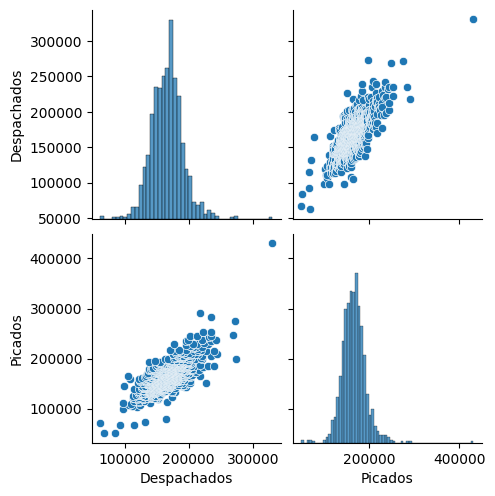

In [71]:
sns.pairplot(forecast)

In [72]:
corr = forecast.corr()

<ipython-input-72-183e35b746f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = forecast.corr()


<Axes: >

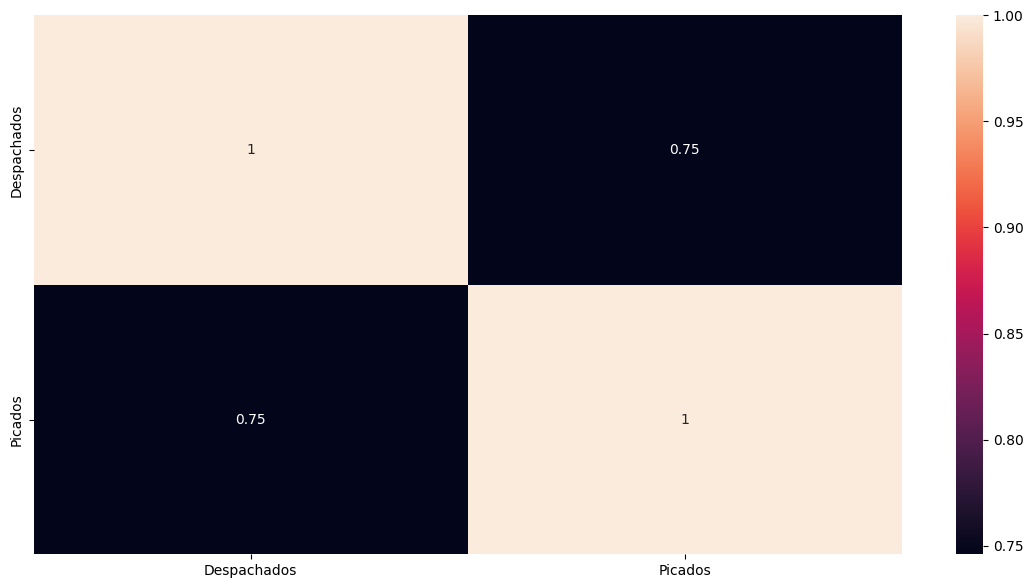

In [73]:
ax = plt.subplots(figsize=(14,7))
sns.heatmap(corr, annot=True)

In [74]:
#X = forecast.Despachados
#y = forecast.Picados

In [75]:
# Revisando las columnas
forecast.columns

Index(['Fecha', 'Despachados', 'Picados'], dtype='object')

In [76]:
# target_col = "Despachados"
# y es el target --
x = forecast['Picados'].values
y = forecast['Despachados'].values
# Reshape
x = x.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.30,
                                                    random_state=42)

In [77]:
reg_multiple = LinearRegression ()
reg_multiple.fit(x_train, y_train)

LinearRegression()

In [78]:
reg_multiple.intercept_

52560.750666129854

In [79]:
predictions = reg_multiple.predict(x)

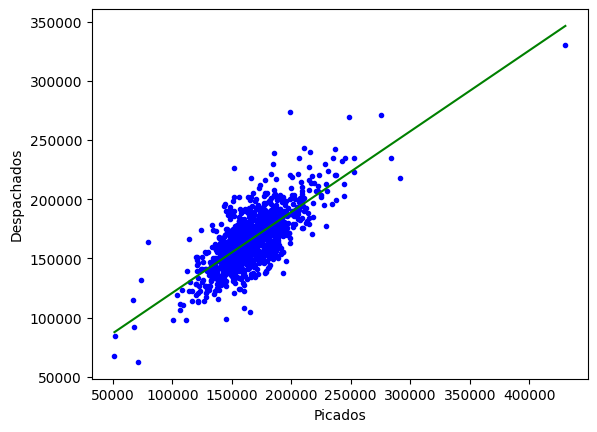

In [80]:
plt.scatter(x, y, color='b', marker='.')
plt.plot(x, predictions, color='g')
plt.xlabel('Picados')
plt.ylabel('Despachados')
plt.show()

In [81]:
# Entrenamiento del modelo
model_regression_lineal = LinearRegression()
model_regression_lineal.fit(x_train, y_train)

LinearRegression()

In [82]:
# Predecir el conjunto de test
y_pred = model_regression_lineal.predict(x_test)
residual = y_test - y_pred

<ipython-input-83-39aa08a2a2a4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residual)


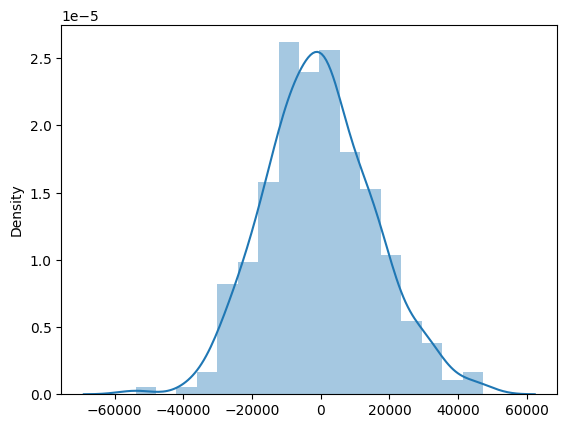

In [83]:
# Gráfico: Validación del Residual como una Distribución Normal
ax = sns.distplot(residual)

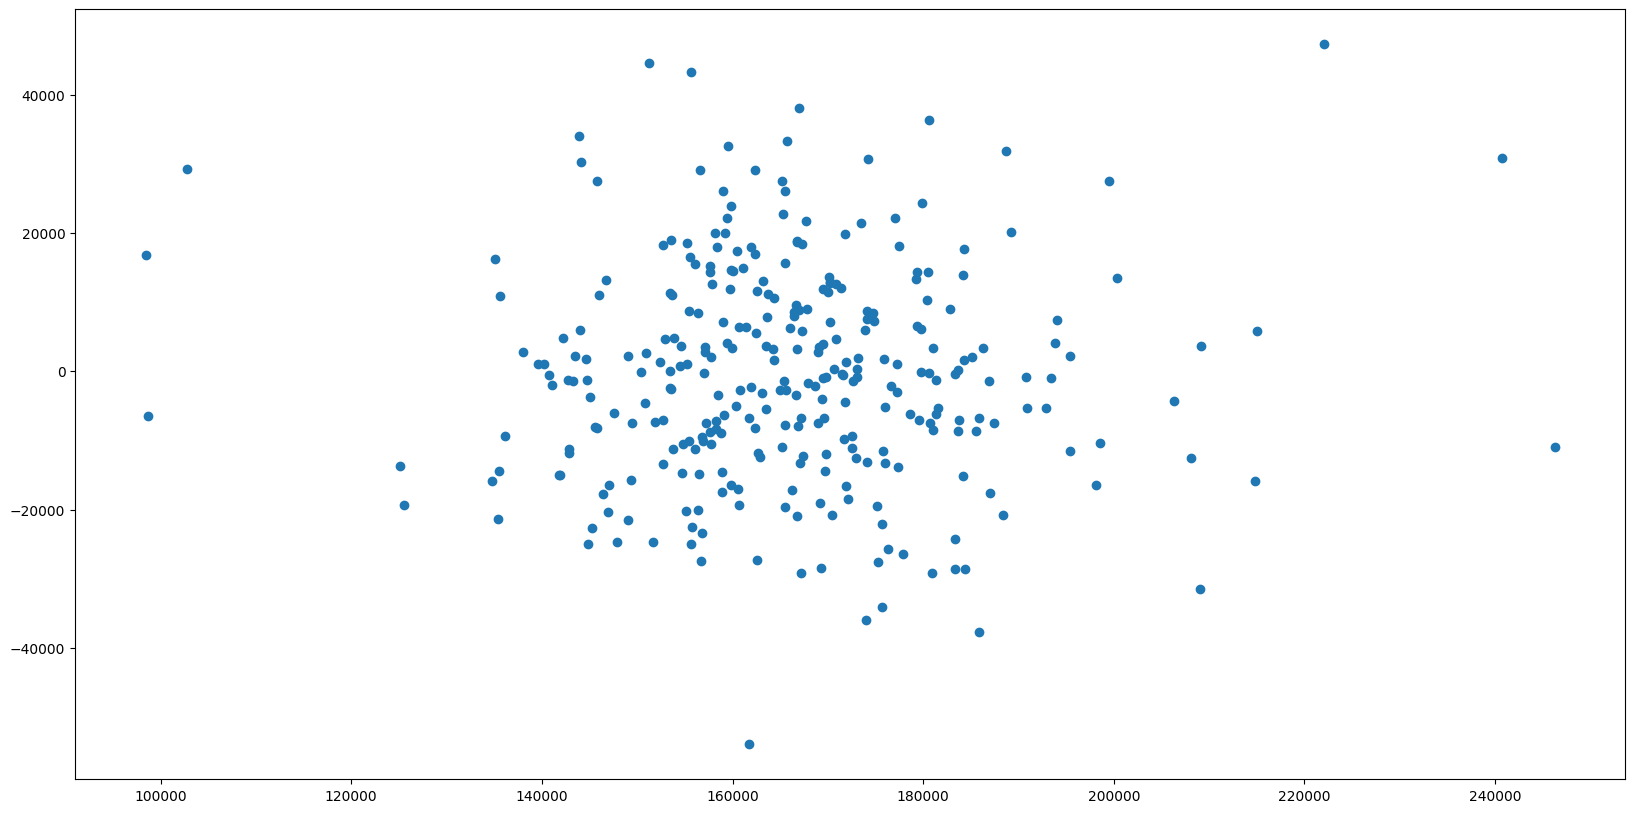

In [84]:
# Gráfico: Validación de Homocedasticidad
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(y_pred, residual)

In [85]:
# Mostrar indicadores de precision
rmse, mape = indicadores_regresion(y_test,y_pred)
print(f'RMSE: {rmse} - MAPE: {mape}')

NameError: ignored